# Project 4
Ruben Pena   
UN5550  
10/10/2018  
Due 10/12/2018  

In [14]:
import numpy as np
import pandas as pd
# Apparently Anaconda has a different mnist package than python-mnist
#https://github.com/datapythonista/mnist for info - anaconda developer
import mnist
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import neighbors, metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [2]:
#Anaconda minst loading(from dev page - The dataset is downloaded and cached in your temporary directory, so, calling the functions again, is much faster and doesn't hit the server)
X_train = mnist.train_images()
y_train = mnist.train_labels()
X_test = mnist.test_images()
y_test = mnist.test_labels()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

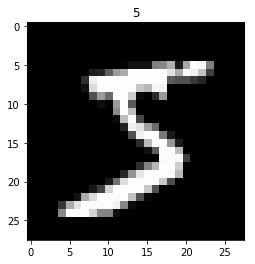

In [7]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])

In [8]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [9]:
X_test.shape

(10000, 784)

In [10]:
X_train.shape

(60000, 784)

### In your own words, explain how the K nearest neighbor (KNN) algorithm works.

KNN is a supervised learning classifier that uses euclidean distance(some version of KNN) to find the nearest neighbors of a fixed point. It takes the class from K number of closest neighbors to that point and averages them to find the most likely class for that point. Using this "majority vote" among all the data in the set, KNN distinguishes classes.

### Develop python functions to compute the accuracy, sensitivity, specificity, precision and negative predictive value

In [12]:
#Accuracy
def accuracy(tp, fp, fn, tn):
    return ((tp+tn)/(tp+fp+fn+tn))

#Recall
def recall(tp, fp, fn, tn):
    return tp/(tp+fn)

#Specificity
def specificity (tp, fp, fn, tn):
    return tn/(tn+fp)

#Precision
def precision(tp, fp, fn, tn):
    return tp/(tp+fp)

#Negative Predictive Value
def NegativePredictiveValue(tp, fp, fn, tn):
    return tn/(tn+fn)

In [16]:
def deconfuse(cm):
    fp = cm.sum(axis=0) - np.diag(cm)
    fp = sum(fp)
    #sum columns of matrix - the diagonals
    fn = cm.sum(axis=1) - np.diag(cm)
    fn = sum(fn)
    #tps are all on diags
    tp = np.diag(cm)
    tp = sum(tp)
    #derive tn from the other values
    tn = cm.sum() - (fp + fn + tp)
    
    #Accuracy
    acc = ((tp+tn)/(tp+fp+fn+tn))
    #Recall
    rcl = tp/(tp+fn)
    #Specificity
    spc = tn/(tn+fp)
    #Precision
    prc = tp/(tp+fp)
    #Negative Predictive Value
    npv = tn/(tn+fn)
    
    return print()
     

TypeError: confusion_matrix() got an unexpected keyword argument 'axis'

### Apply a KNN Classifier with n_neighbors = {3,4,5}.   
#### For each model, compute the confusion matrix, as applied to the test set report the accuracy, sensitivity, specificity, precision and negative predictive value using your developed functions. compare the different models.

In [17]:
knn3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
predict3 = knn3.predict(X_test)

In [33]:
cm3 = confusion_matrix(y_test, predict3)
cm3.sum()

10000

SyntaxError: invalid syntax (<ipython-input-32-d2c1c37227a5>, line 8)

In [19]:
knn4 = neighbors.KNeighborsClassifier(n_neighbors = 4)
knn4.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [ ]:
predict4 = knn.predict(X_test)

In [ ]:
cm4 = confusion_matrix(y_test, predict4)

In [ ]:
knn5 = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train, y_train)

In [ ]:
predict5 = knn.predict(X_test)

In [ ]:
cm5 = confusion_matrix(y_test, predict5)

### Apply an SVM classifier. 

#### Again, report the confusion matrix, as well as the accuracy, sensitivity, specificity, precision and negative predictive value.
#### How does the SVN classifier compare to the KNN classifiers?

In [ ]:
svm = SVC(kernel = 'rbf', random_state = 7)
svm.fit(train_x, train_y)
#Predicting the Test Set
y_hat = svm.predict(test_x)
cmSVM = confusion_matrix(test_y, y_hat)

sources:lucidv01d https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal